In [1]:
import codecs                     # load UTF-8 Content
import json                       # load JSON files
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
from dateutil import *            # I prefer dateutil for parsing dates
import math                       # transformations
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm      # access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting
import scipy
import linearmodels as lm# Advanced linear models
from stargazer.stargazer import Stargazer # For beautiful tables
from IPython.core.display import HTML # From render html inside iPython
from collections import OrderedDict # Ordered Dictionary
from linearmodels.iv.results import compare # Compare IVs
from statsmodels.iolib.summary2 import summary_col

In [2]:
import statsmodels.api as sm
import pylab as pl

### Washing Machine

In [3]:
data1 = pd.read_csv('washing_machine.csv')
data1.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1279.00              0.0     1.0          7     1   TR       0   
1           1199.00             10.0     1.0          3     0   NG       0   
2           1149.99             55.0     1.0          3     1   TA       0   
3           1068.00             20.0     1.0          7     1   UB       0   
4           1299.00              5.0     1.0          2     0   CM       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             0           0        2019  ...                      0   
2             1           1        2020  ...                      0   
3             0           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 1         0.293692  
1                 1         0.055774  
2                 1         0.181929  
3                 1         0.061258  
4                 1         0.064067  

[5 rows x 34 columns]

In [4]:
data1.describe()

PLU_RETAIL_PRICE  DELIVERY_CHARGE    VOLUME      LEAD_TIME  \
count     834507.000000    834507.000000  834507.0  834507.000000   
mean         304.785369        24.438528       1.0       4.992167   
std          119.928494        22.266810       0.0       3.570614   
min           72.990000         0.000000       1.0       0.000000   
25%          219.000000         0.000000       1.0       3.000000   
50%          269.000000        20.000000       1.0       4.000000   
75%          379.000000        45.000000       1.0       6.000000   
max         1699.990000       120.000000       1.0      30.000000   

                WEEE         D_OR_Q   Installation     IF_WEEKEND  \
count  834507.000000  834507.000000  834507.000000  834507.000000   
mean        0.440295       0.094561       0.421464       0.448344   
std         0.496423       0.292608       0.493794       0.497325   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ORDER_YEAR    ORDER_MONTH  ...  COOKING FREE STANDING  DISHWASHERS  \
count  834507.000000  834507.000000  ...               834507.0     834507.0   
mean     2019.214529       5.652779  ...                    0.0          0.0   
std         0.410495       3.603465  ...                    0.0          0.0   
min      2019.000000       1.000000  ...                    0.0          0.0   
25%      2019.000000       2.000000  ...                    0.0          0.0   
50%      2019.000000       5.000000  ...                    0.0          0.0   
75%      2019.000000       9.000000  ...                    0.0          0.0   
max      2020.000000      12.000000  ...                    0.0          0.0   

       FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
count         834507.0        834507.0                 834507.0   
mean               0.0             0.0                      0.0   
std                0.0             0.0                      0.0   
min                0.0             0.0                      0.0   
25%                0.0             0.0                      0.0   
50%                0.0             0.0                      0.0   
75%                0.0             0.0                      0.0   
max                0.0             0.0                      0.0   

       SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
count                        834507.0       834507.0       834507.0   
mean                              0.0            0.0            0.0   
std                               0.0            0.0            0.0   
min                               0.0            0.0            0.0   
25%                               0.0            0.0            0.0   
50%                               0.0            0.0            0.0   
75%                               0.0            0.0            0.0   
max                               0.0            0.0            0.0   

       WASHING MACHINES  DIFFERENCE_RATE  
count          834507.0    834507.000000  
mean                1.0         0.107343  
std                 0.0         0.075390  
min                 1.0         0.023819  
25%                 1.0         0.051971  
50%                 1.0         0.077205  
75%                 1.0         0.142847  
max                 1.0         0.942810  

[8 rows x 33 columns]

In [5]:
del data1['ORDER_YEAR'],data1['ORDER_MONTH'],data1['ORDER_DAY'],data1['DELIVERY_DAY'],data1['DELIVERY_MONTH'],data1['DELIVERY_YEAR']

In [6]:
data1.columns

Index(['PLU_RETAIL_PRICE', 'DELIVERY_CHARGE', 'VOLUME', 'LEAD_TIME', 'WEEE',
       'AREA', 'D_OR_Q', 'Installation', 'IF_WEEKEND', 'High Earners',
       'Lower Income Families', 'Middle Income Families', 'Millennials',
       'Older Lower Income', 'Older Middle Income', 'Retired',
       '1 DOOR FRIDGES & FREEZERS', 'BUILT-IN COOKING',
       'COOKING FREE STANDING', 'DISHWASHERS', 'FRIDGE FREEZERS',
       'INTEGRATED MDA', 'LARGE SCREEN TELEVISION',
       'SLIM AMERICAN STYLE FRIDGE FRZ', 'TUMBLE DRYERS', 'WASHER DRYERS',
       'WASHING MACHINES', 'DIFFERENCE_RATE'],
      dtype='object')

In [7]:
data1['INTERCEPT']=1

In [8]:
data1["time_weee"] = data1["LEAD_TIME"].mul(data1["WEEE"])
data1["time_installation"] = data1["LEAD_TIME"].mul(data1["Installation"])

In [9]:
data1["lg_retail_price"] = np.log(data1["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data1[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [10]:
data1["lg_delivery_charge"] = np.log(data1["DELIVERY_CHARGE"]+1) # Transfrom to Log
axes = data1[["DELIVERY_CHARGE","lg_delivery_charge"]].hist() # draw Histogram

In [19]:
independent_variables = ['lg_retail_price','DELIVERY_CHARGE','LEAD_TIME','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE']
X = data1[independent_variables]

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         7.2  lg_retail_price
1         7.2  DELIVERY_CHARGE
2         3.2        LEAD_TIME
3         3.2             WEEE
4         3.6     Installation
5         1.8       IF_WEEKEND
6         3.0  DIFFERENCE_RATE

In [26]:
independent_variables = ['lg_retail_price','DELIVERY_CHARGE','LEAD_TIME','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE','INTERCEPT']
X = data1[independent_variables]

In [27]:
logit = sm.Logit(data1['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.258400
         Iterations 7


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               834507
Model:                          Logit   Df Residuals:                   834499
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1743
Time:                        00:58:33   Log-Likelihood:            -2.1564e+05
converged:                       True   LL-Null:                   -2.6117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.3740      0.012     32.238      0.000       0.351       0.397
DELIVERY_CHARGE     0.0798      0.000    269.109      0.000       0.079       0.080
LEAD_TIME           0.0982      0.001     99.966      0.000       0.096       0.100
WEEE               -1.3610      0.010   -132.692      0.000      -1.381      -1.341
Installation       -1.4946      0.012   -129.277      0.000      -1.517      -1.472
IF_WEEKEND         -0.0920      0.008    -11.191      0.000      -0.108      -0.076
DIFFERENCE_RATE    -0.2179      0.055     -3.986      0.000      -0.325      -0.111
INTERCEPT          -5.9466      0.067    -88.831      0.000      -6.078      -5.815
===================================================================================
"""

In [29]:
print(np.exp(result.params))

lg_retail_price    1.453547
DELIVERY_CHARGE    1.083019
LEAD_TIME          1.103179
WEEE               0.256416
Installation       0.224339
IF_WEEKEND         0.912101
DIFFERENCE_RATE    0.804188
INTERCEPT          0.002615
dtype: float64


In [30]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.420868  1.486978  1.453547
DELIVERY_CHARGE  1.082390  1.083649  1.083019
LEAD_TIME        1.101058  1.105305  1.103179
WEEE             0.251313  0.261622  0.256416
Installation     0.219312  0.229480  0.224339
IF_WEEKEND       0.897522  0.926917  0.912101
DIFFERENCE_RATE  0.722464  0.895157  0.804188
INTERCEPT        0.002293  0.002981  0.002615


### Large Screen Television

In [31]:
data2 = pd.read_csv('large_screen_TV.csv')
data2.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0            1899.0              0.0     1.0          4     0   TD       0   
1            1299.0              0.0     1.0          5     0   NG       0   
2            2399.0              0.0     1.0          5     0   SK       0   
3            9999.0              0.0     1.0          5     0   CH       0   
4            3999.0             30.0     1.0          1     0    L       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2019  ...                      0   
1             0           1        2019  ...                      0   
2             0           1        2019  ...                      0   
3             0           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        1   
1            0                0               0                        1   
2            0                0               0                        1   
3            0                0               0                        1   
4            0                0               0                        1   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.332734  
1                 0         0.055774  
2                 0         0.074269  
3                 0         0.105094  
4                 0         0.062209  

[5 rows x 34 columns]

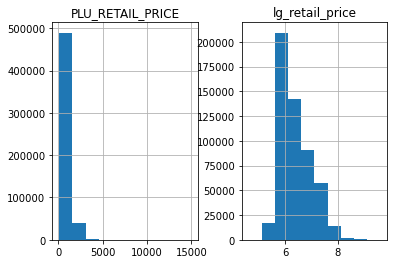

In [32]:
data2["lg_retail_price"] = np.log(data2["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data2[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

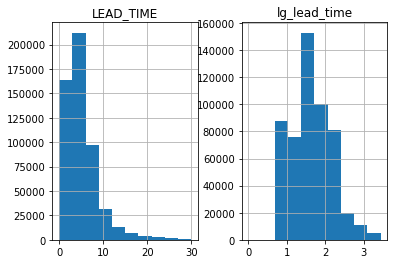

In [33]:
data2["lg_lead_time"] = np.log(data2["LEAD_TIME"]+1) # Transfrom to Log
axes = data2[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [34]:
data2['INTERCEPT']=1

In [35]:
data2["time_weee"] = data2["LEAD_TIME"].mul(data2["WEEE"])
data2["time_installation"] = data2["LEAD_TIME"].mul(data2["Installation"])

In [38]:
independent_variables = ['lg_retail_price','DELIVERY_CHARGE','LEAD_TIME','WEEE','Installation','DIFFERENCE_RATE']
X = data2[independent_variables]

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         4.7  lg_retail_price
1         3.1  DELIVERY_CHARGE
2         2.6        LEAD_TIME
3         1.2             WEEE
4         2.6     Installation
5         2.9  DIFFERENCE_RATE

In [42]:
independent_variables = ['lg_retail_price','DELIVERY_CHARGE','LEAD_TIME','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data2[independent_variables]

In [43]:
logit = sm.Logit(data2['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.282476
         Iterations 7


In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               533574
Model:                          Logit   Df Residuals:                   533567
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1179
Time:                        01:00:10   Log-Likelihood:            -1.5072e+05
converged:                       True   LL-Null:                   -1.7086e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.4208      0.008     53.960      0.000       0.406       0.436
DELIVERY_CHARGE     0.0529      0.000    168.428      0.000       0.052       0.053
LEAD_TIME           0.0309      0.001     25.887      0.000       0.029       0.033
WEEE               -0.3269      0.022    -15.086      0.000      -0.369      -0.284
Installation       -1.5509      0.018    -83.919      0.000      -1.587      -1.515
DIFFERENCE_RATE    -0.2207      0.066     -3.352      0.001      -0.350      -0.092
INTERCEPT          -5.6061      0.051   -108.889      0.000      -5.707      -5.505
===================================================================================
"""

In [45]:
print(np.exp(result.params))

lg_retail_price    1.523215
DELIVERY_CHARGE    1.054273
LEAD_TIME          1.031355
WEEE               0.721121
Installation       0.212064
DIFFERENCE_RATE    0.801937
INTERCEPT          0.003675
dtype: float64


In [46]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.500109  1.546676  1.523215
DELIVERY_CHARGE  1.053624  1.054921  1.054273
LEAD_TIME        1.028947  1.033769  1.031355
WEEE             0.691131  0.752412  0.721121
Installation     0.204520  0.219886  0.212064
DIFFERENCE_RATE  0.704830  0.912423  0.801937
INTERCEPT        0.003322  0.004065  0.003675


### Fridge Freezers

In [47]:
data3 = pd.read_csv('fridge_freezer.csv')
data3.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0        1593.98999             40.0     1.0          7     1   PO       0   
1        1799.00000              0.0     1.0          4     0   HU       0   
2        1599.00000             40.0     1.0          5     0   SE       0   
3        1699.00000             20.0     1.0          6     1   DE       1   
4        1482.00000             50.0     1.0          3     1   RH       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           1        2019  ...                      0   
2             0           1        2019  ...                      0   
3             0           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                1               0                        0   
1            0                1               0                        0   
2            0                1               0                        0   
3            0                1               0                        0   
4            0                1               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.047662  
1                 0         0.251126  
2                 0         0.036795  
3                 0         0.044488  
4                 0         0.084498  

[5 rows x 34 columns]

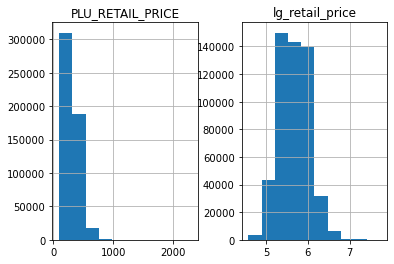

In [48]:
data3["lg_retail_price"] = np.log(data3["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data3[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

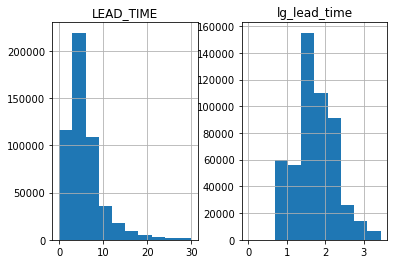

In [49]:
data3["lg_lead_time"] = np.log(data3["LEAD_TIME"]+1) # Transfrom to Log
axes = data3[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [50]:
data3['INTERCEPT']=1

In [51]:
data3["time_weee"] = data3["LEAD_TIME"].mul(data3["WEEE"])
data3["time_installation"] = data3["LEAD_TIME"].mul(data3["Installation"])

In [52]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE']
X = data3[independent_variables]

In [53]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         6.8  lg_retail_price
1         2.9        LEAD_TIME
2         3.1  DELIVERY_CHARGE
3         2.7             WEEE
4         1.0     Installation
5         1.8       IF_WEEKEND
6         3.0  DIFFERENCE_RATE

In [54]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE','INTERCEPT']
X = data3[independent_variables]

In [55]:
logit = sm.Logit(data3['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.294950
         Iterations 7


In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               518566
Model:                          Logit   Df Residuals:                   518558
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1415
Time:                        01:01:01   Log-Likelihood:            -1.5295e+05
converged:                       True   LL-Null:                   -1.7816e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1681      0.014     11.862      0.000       0.140       0.196
LEAD_TIME           0.0724      0.001     70.387      0.000       0.070       0.074
DELIVERY_CHARGE     0.0604      0.000    211.265      0.000       0.060       0.061
WEEE               -1.1853      0.012    -97.115      0.000      -1.209      -1.161
Installation       -0.6291      0.210     -2.990      0.003      -1.041      -0.217
IF_WEEKEND         -0.0392      0.010     -4.052      0.000      -0.058      -0.020
DIFFERENCE_RATE    -0.1595      0.066     -2.423      0.015      -0.289      -0.030
INTERCEPT          -4.1982      0.081    -51.752      0.000      -4.357      -4.039
===================================================================================
"""

In [57]:
print(np.exp(result.params))

lg_retail_price    1.183055
LEAD_TIME          1.075114
DELIVERY_CHARGE    1.062300
WEEE               0.305651
Installation       0.533070
IF_WEEKEND         0.961594
DIFFERENCE_RATE    0.852568
INTERCEPT          0.015023
dtype: float64


In [58]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.150647  1.216375  1.183055
LEAD_TIME        1.072947  1.077284  1.075114
DELIVERY_CHARGE  1.061705  1.062896  1.062300
WEEE             0.298426  0.313050  0.305651
Installation     0.352940  0.805132  0.533070
IF_WEEKEND       0.943549  0.979983  0.961594
DIFFERENCE_RATE  0.749363  0.969986  0.852568
INTERCEPT        0.012815  0.017612  0.015023


### Overall

In [29]:
anova_results = anova_lm(ols(formula,data4).fit())
print(anova_results)

                               df         sum_sq       mean_sq              F  \
PLU_RETAIL_PRICE              1.0     665.859359    665.859359    7520.027106   
DELIVERY_CHARGE               1.0   13576.517092  13576.517092  153329.340801   
LEAD_TIME                     1.0       7.214504      7.214504      81.478565   
DIFFERENCE_RATE               1.0       3.721068      3.721068      42.024688   
IF_WEEKEND                    1.0       1.853755      1.853755      20.935788   
WEEE                          1.0    1903.241441   1903.241441   21494.670062   
Installation                  1.0    5754.286360   5754.286360   64987.281228   
Retired                       1.0       0.024801      0.024801       0.280100   
High_Earners                  1.0      34.924321     34.924321     394.425396   
Lower_Income_Families         1.0      20.796289     20.796289     234.867404   
Middle_Income_Families        1.0      11.188497     11.188497     126.359713   
Older_Lower_Income          

In [59]:
data4 = pd.read_csv('Third_cluster_df.csv')
data4.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0            923.00             45.0     1.0          6     0   EN       1   
1           1174.99              0.0     1.0          4     0   BN       0   
2            929.00              0.0     1.0          1     0   SK       0   
3           1044.99             45.0     1.0          5     1   WV       0   
4           1044.99             55.0     1.0          1     1   GU       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             0           0        2020  ...                      0   
2             0           0        2019  ...                      0   
3             1           0        2020  ...                      0   
4             0           0        2020  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            1                0               0                        0   
2            1                0               0                        0   
3            1                0               0                        0   
4            1                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.096660  
1                 0         0.061808  
2                 0         0.074269  
3                 0         0.048007  
4                 0         0.045579  

[5 rows x 34 columns]

In [60]:
data4["lg_retail_price"] = np.log(data4["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data4[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [61]:
data4['INTERCEPT']=1

In [62]:
data4["time_weee"] = data4["LEAD_TIME"].mul(data4["WEEE"])
data4["time_installation"] = data4["LEAD_TIME"].mul(data4["Installation"])

In [63]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE', 'High Earners',
       'Middle Income Families', 'Millennials', 'Older Lower Income',
       'Older Middle Income', 'Retired', '1 DOOR FRIDGES & FREEZERS',
       'BUILT-IN COOKING', 'COOKING FREE STANDING', 'DISHWASHERS',
       'FRIDGE FREEZERS', 'INTEGRATED MDA', 'LARGE SCREEN TELEVISION',
       'SLIM AMERICAN STYLE FRIDGE FRZ', 'TUMBLE DRYERS', 'WASHER DRYERS',
       'WASHING MACHINES','time_weee','time_installation']
X = data4[independent_variables]

In [64]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                        features
0         27.6                 lg_retail_price
1          4.4                       LEAD_TIME
2          4.5                 DELIVERY_CHARGE
3          5.5                            WEEE
4          5.4                    Installation
5          1.8                      IF_WEEKEND
6          3.0                 DIFFERENCE_RATE
7          1.8                    High Earners
8          1.6          Middle Income Families
9          1.6                     Millennials
10         1.9              Older Lower Income
11         1.6             Older Middle Income
12         2.2                         Retired
13         2.7       1 DOOR FRIDGES & FREEZERS
14         2.5                BUILT-IN COOKING
15         2.5           COOKING FREE STANDING
16         1.9                     DISHWASHERS
17         3.8                 FRIDGE FREEZERS
18         2.2                  INTEGRATED MDA
19         4.5         LARGE SCREEN TELEVISION
20         1.3  SLIM AMERICAN STYLE FRIDGE FRZ
21         2.5                   TUMBLE DRYERS
22         1.6                   WASHER DRYERS
23         5.6                WASHING MACHINES
24         4.7                       time_weee
25         4.7               time_installation

In [8]:
logit = sm.Logit(data4['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.305880
         Iterations 7


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:              3769092
Model:                          Logit   Df Residuals:                  3769065
Method:                           MLE   Df Model:                           26
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.09246
Time:                        02:50:50   Log-Likelihood:            -1.1529e+06
converged:                       True   LL-Null:                   -1.2704e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lg_retail_price                    0.2959      0.004     72.449      0.000       0.288       0.304
LEAD_TIME                          0.0352      0.000     73.571      0.000       0.034       0.036
DELIVERY_CHARGE                    0.0440      0.000    429.836      0.000       0.044       0.044
WEEE                              -0.6869      0.007   -100.132      0.000      -0.700      -0.673
Installation                      -0.9535      0.008   -118.485      0.000      -0.969      -0.938
IF_WEEKEND                        -0.0105      0.004     -2.984      0.003      -0.017      -0.004
DIFFERENCE_RATE                   -0.2080      0.024     -8.804      0.000      -0.254      -0.162
INTERCEPT                         -4.8675      0.029   -169.447      0.000      -4.924      -4.811
High Earners                       0.1543      0.006     24.367      0.000       0.142       0.167
Middle Income Families             0.0337      0.007      4.697      0.000       0.020       0.048
Millennials                        0.1079      0.007     15.657      0.000       0.094       0.121
Older Lower Income                 0.1452      0.006     23.918      0.000       0.133       0.157
Older Middle Income                0.1404      0.007     20.092      0.000       0.127       0.154
Retired                            0.0863      0.006     14.839      0.000       0.075       0.098
1 DOOR FRIDGES & FREEZERS          0.6665      0.012     57.664      0.000       0.644       0.689
BUILT-IN COOKING                  -0.3404      0.012    -27.902      0.000      -0.364      -0.317
COOKING FREE STANDING             -0.6643      0.012    -54.899      0.000      -0.688      -0.641
DISHWASHERS                        0.3482      0.013     26.705      0.000       0.323       0.374
FRIDGE FREEZERS                    0.2421      0.011     23.014      0.000       0.222       0.263
INTEGRATED MDA                    -0.5167      0.012    -41.479      0.000      -0.541      -0.492
LARGE SCREEN TELEVISION            0.0854      0.010      8.510      0.000       0.066       0.105
SLIM AMERICAN STYLE FRIDGE FRZ     0.1342      0.017      7.790      0.000       0.100       0.168
TUMBLE DRYERS                      0.8093      0.011     72.854      0.000       0.787       0.831
WASHER DRYERS                      0.5729      0.014     41.814      0.000       0.546       0.600
WASHING MACHINES                   0.3014      0.010     29.141      0.000       0.281       0.322
time_weee                         -0.0068      0.001     -7.839      0.000      -0.008      -0.005
time_installation                 -0.0501      0.001    -52.271      0.000      -0.052      -0.048
==================================================================================================
"""

In [10]:
print(np.exp(result.params))

lg_retail_price                   1.344344
LEAD_TIME                         1.035826
DELIVERY_CHARGE                   1.044997
WEEE                              0.503126
Installation                      0.385400
IF_WEEKEND                        0.989526
DIFFERENCE_RATE                   0.812211
INTERCEPT                         0.007693
High Earners                      1.166798
Middle Income Families            1.034290
Millennials                       1.113961
Older Lower Income                1.156280
Older Middle Income               1.150746
Retired                           1.090141
1 DOOR FRIDGES & FREEZERS         1.947464
BUILT-IN COOKING                  0.711473
COOKING FREE STANDING             0.514657
DISHWASHERS                       1.416449
FRIDGE FREEZERS                   1.273964
INTEGRATED MDA                    0.596485
LARGE SCREEN TELEVISION           1.089154
SLIM AMERICAN STYLE FRIDGE FRZ    1.143645
TUMBLE DRYERS                     2.246254
WASHER DRYE

In [11]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                                    2.5%     97.5%        OR
lg_retail_price                 1.333625  1.355148  1.344344
LEAD_TIME                       1.034856  1.036798  1.035826
DELIVERY_CHARGE                 1.044787  1.045207  1.044997
WEEE                            0.496407  0.509936  0.503126
Installation                    0.379369  0.391527  0.385400
IF_WEEKEND                      0.982706  0.996393  0.989526
DIFFERENCE_RATE                 0.775458  0.850706  0.812211
INTERCEPT                       0.007271  0.008138  0.007693
High Earners                    1.152410  1.181366  1.166798
Middle Income Families          1.019842  1.048943  1.034290
Millennials                     1.099012  1.129112  1.113961
Older Lower Income              1.142603  1.170121  1.156280
Older Middle Income             1.135092  1.166617  1.150746
Retired                         1.077785  1.102639  1.090141
1 DOOR FRIDGES & FREEZERS       1.903841  1.992087  1.947464
BUILT-IN COOKING        

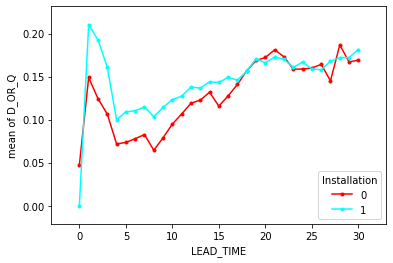

In [45]:
import statsmodels
fig = statsmodels.graphics.factorplots.interaction_plot(data4['LEAD_TIME'],data4['Installation'],data4['D_OR_Q'])
import matplotlib.pyplot as plt
plt.show()

### One Door

In [43]:
data0 = pd.read_csv('1door_fridge.csv')
data0.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0         49.990002             20.0     1.0          1     0   CV       0   
1         49.990002              0.0     1.0          5     0   SN       0   
2         49.990002              0.0     1.0          6     0    M       0   
3       1099.989990             30.0     1.0          2     0    N       0   
4         49.990002             20.0     1.0          4     0   CV       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           0        2020  ...                      0   
2             0           1        2020  ...                      0   
3             0           1        2020  ...                      0   
4             0           1        2020  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.165544  
1                 0         0.135460  
2                 0         0.044827  
3                 0         0.049420  
4                 0         0.165544  

[5 rows x 34 columns]

In [98]:
data0.describe()

PLU_RETAIL_PRICE  DELIVERY_CHARGE    VOLUME      LEAD_TIME  \
count     375066.000000    375066.000000  375066.0  375066.000000   
mean         198.300832        10.309051       1.0       6.662718   
std          112.562119        15.560908       0.0       4.665473   
min           49.970000         0.000000       1.0       1.000000   
25%          129.000000         0.000000       1.0       4.000000   
50%          159.000000         0.000000       1.0       5.000000   
75%          230.000000        20.000000       1.0       9.000000   
max         1499.990000       120.000000       1.0      30.000000   

                WEEE         D_OR_Q   Installation     IF_WEEKEND  \
count  375066.000000  375066.000000  375066.000000  375066.000000   
mean        0.226048       0.123245       0.000299       0.408581   
std         0.418271       0.328719       0.017278       0.491572   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ORDER_YEAR    ORDER_MONTH  ...  COOKING FREE STANDING  DISHWASHERS  \
count  375066.000000  375066.000000  ...               375066.0     375066.0   
mean     2019.254078       5.870369  ...                    0.0          0.0   
std         0.435342       3.569421  ...                    0.0          0.0   
min      2019.000000       1.000000  ...                    0.0          0.0   
25%      2019.000000       3.000000  ...                    0.0          0.0   
50%      2019.000000       5.000000  ...                    0.0          0.0   
75%      2020.000000       9.000000  ...                    0.0          0.0   
max      2020.000000      12.000000  ...                    0.0          0.0   

       FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
count         375066.0        375066.0                 375066.0   
mean               0.0             0.0                      0.0   
std                0.0             0.0                      0.0   
min                0.0             0.0                      0.0   
25%                0.0             0.0                      0.0   
50%                0.0             0.0                      0.0   
75%                0.0             0.0                      0.0   
max                0.0             0.0                      0.0   

       SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
count                        375066.0       375066.0       375066.0   
mean                              0.0            0.0            0.0   
std                               0.0            0.0            0.0   
min                               0.0            0.0            0.0   
25%                               0.0            0.0            0.0   
50%                               0.0            0.0            0.0   
75%                               0.0            0.0            0.0   
max                               0.0            0.0            0.0   

       WASHING MACHINES  DIFFERENCE_RATE  
count          375066.0    375066.000000  
mean                0.0         0.110028  
std                 0.0         0.076775  
min                 0.0         0.023819  
25%                 0.0         0.052040  
50%                 0.0         0.083825  
75%                 0.0         0.143345  
max                 0.0         0.942810  

[8 rows x 33 columns]

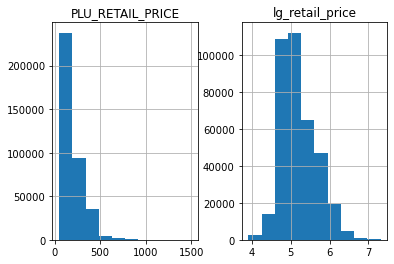

In [44]:
data0["lg_retail_price"] = np.log(data0["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data0[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

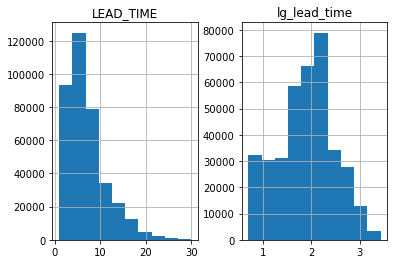

In [89]:
data0["lg_lead_time"] = np.log(data0["LEAD_TIME"]+1) # Transfrom to Log
axes = data0[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [45]:
data0['INTERCEPT']=1

In [46]:
data0["time_weee"] = data0["LEAD_TIME"].mul(data0["WEEE"])
data0["time_installation"] = data0["LEAD_TIME"].mul(data0["Installation"])

In [47]:
independent_variables = ['LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','time_weee','time_installation','INTERCEPT']
X = data0[independent_variables]

In [48]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor           features
0         1.4          LEAD_TIME
1         1.8    DELIVERY_CHARGE
2         3.9               WEEE
3         2.6       Installation
4         1.0    DIFFERENCE_RATE
5         3.3          time_weee
6         2.6  time_installation
7         6.5          INTERCEPT

In [49]:
logit = sm.Logit(data0['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.313925
         Iterations 7


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               375066
Model:                          Logit   Df Residuals:                   375058
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1591
Time:                        03:26:19   Log-Likelihood:            -1.1774e+05
converged:                       True   LL-Null:                   -1.4003e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
LEAD_TIME             0.0203      0.001     14.344      0.000       0.018       0.023
DELIVERY_CHARGE       0.0727      0.000    181.821      0.000       0.072       0.073
WEEE                 -1.1769      0.022    -53.511      0.000      -1.220      -1.134
Installation         -0.2377      0.601     -0.396      0.692      -1.415       0.940
DIFFERENCE_RATE      -0.2842      0.073     -3.918      0.000      -0.426      -0.142
time_weee             0.0011      0.003      0.415      0.678      -0.004       0.006
time_installation    -0.0770      0.076     -1.020      0.308      -0.225       0.071
INTERCEPT            -2.8288      0.015   -192.567      0.000      -2.858      -2.800
=====================================================================================
"""

In [51]:
print(np.exp(result.params))

LEAD_TIME            1.020539
DELIVERY_CHARGE      1.075417
WEEE                 0.308243
Installation         0.788407
DIFFERENCE_RATE      0.752623
time_weee            1.001072
time_installation    0.925876
INTERCEPT            0.059086
dtype: float64


In [52]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                       2.5%     97.5%        OR
LEAD_TIME          1.017708  1.023378  1.020539
DELIVERY_CHARGE    1.074574  1.076260  1.075417
WEEE               0.295238  0.321821  0.308243
Installation       0.242907  2.558948  0.788407
DIFFERENCE_RATE    0.652889  0.867591  0.752623
time_weee          0.996025  1.006144  1.001072
time_installation  0.798495  1.073577  0.925876
INTERCEPT          0.057409  0.060812  0.059086


### Tumble

In [53]:
data8 = pd.read_csv('tumble_dryer.csv')
data8.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1999.99             20.0     1.0          1     0   GL       0   
1           1190.00             15.0     1.0          7     1   TD       0   
2           1259.99             25.0     1.0          5     1   PE       0   
3            916.00              0.0     1.0         26     0   SG       0   
4            915.00             30.0     1.0          1     0   DY       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           0        2019  ...                      0   
2             1           0        2020  ...                      0   
3             0           0        2019  ...                      0   
4             0           0        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              1              0   
1                               0              1              0   
2                               0              1              0   
3                               0              1              0   
4                               0              1              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.165066  
1                 0         0.332734  
2                 0         0.143345  
3                 0         0.129459  
4                 0         0.083825  

[5 rows x 34 columns]

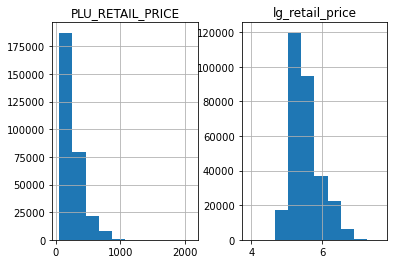

In [54]:
data8["lg_retail_price"] = np.log(data8["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data8[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [55]:
data8['INTERCEPT']=1

In [56]:
data8["time_weee"] = data8["LEAD_TIME"].mul(data8["WEEE"])
data8["time_installation"] = data8["LEAD_TIME"].mul(data8["Installation"])

In [57]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','IF_WEEKEND','time_weee','time_installation','INTERCEPT']
X = data8[independent_variables]

In [58]:
logit = sm.Logit(data8['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.326222
         Iterations 7


In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               297570
Model:                          Logit   Df Residuals:                   297560
Method:                           MLE   Df Model:                            9
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1702
Time:                        03:31:37   Log-Likelihood:                -97074.
converged:                       True   LL-Null:                   -1.1698e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
lg_retail_price       0.2422      0.015     15.732      0.000       0.212       0.272
LEAD_TIME             0.0557      0.001     37.440      0.000       0.053       0.059
DELIVERY_CHARGE       0.0902      0.001    175.537      0.000       0.089       0.091
WEEE                 -1.2329      0.024    -51.797      0.000      -1.280      -1.186
Installation         -0.5307      0.031    -17.245      0.000      -0.591      -0.470
DIFFERENCE_RATE      -0.3070      0.079     -3.898      0.000      -0.461      -0.153
IF_WEEKEND           -0.0305      0.012     -2.543      0.011      -0.054      -0.007
time_weee            -0.0021      0.003     -0.702      0.483      -0.008       0.004
time_installation    -0.0351      0.004     -8.337      0.000      -0.043      -0.027
INTERCEPT            -4.3944      0.087    -50.409      0.000      -4.565      -4.224
=====================================================================================
"""

In [60]:
print(np.exp(result.params))

lg_retail_price      1.274100
LEAD_TIME            1.057257
DELIVERY_CHARGE      1.094426
WEEE                 0.291456
Installation         0.588180
DIFFERENCE_RATE      0.735653
IF_WEEKEND           0.969996
time_weee            0.997946
time_installation    0.965526
INTERCEPT            0.012347
dtype: float64


In [61]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                       2.5%     97.5%        OR
lg_retail_price    1.236222  1.313139  1.274100
LEAD_TIME          1.054180  1.060343  1.057257
DELIVERY_CHARGE    1.093324  1.095529  1.094426
WEEE               0.278171  0.305375  0.291456
Installation       0.553751  0.624750  0.588180
DIFFERENCE_RATE    0.630423  0.858447  0.735653
IF_WEEKEND         0.947486  0.993041  0.969996
time_weee          0.992235  1.003690  0.997946
time_installation  0.957595  0.973522  0.965526
INTERCEPT          0.010407  0.014647  0.012347


### High Earners

In [3]:
data5 = pd.read_csv('high_earner.csv')
data5.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0             950.0             60.0     1.0          2     1   WA       0   
1             950.0             45.0     1.0         14     1   WD       0   
2             925.0             30.0     1.0          3     0   CV       0   
3             930.0             45.0     1.0          5     1    E       0   
4             945.0             25.0     1.0          3     1   SM       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             1           1        2019  ...                      0   
2             1           1        2019  ...                      0   
3             1           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              1   
2                               0              0              1   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.034738  
1                 0         0.075915  
2                 0         0.165544  
3                 0         0.050592  
4                 0         0.092205  

[5 rows x 34 columns]

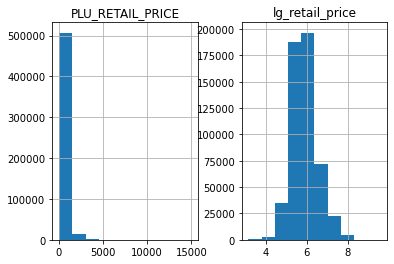

In [4]:
data5["lg_retail_price"] = np.log(data5["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data5[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

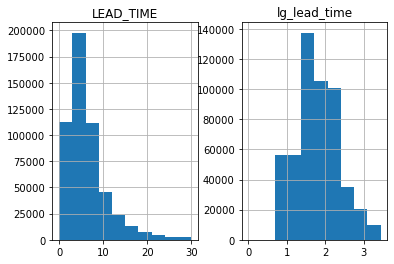

In [193]:
data5["lg_lead_time"] = np.log(data5["LEAD_TIME"]+1) # Transfrom to Log
axes = data5[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [5]:
data5['INTERCEPT']=1

In [7]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data5[independent_variables]

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.6  DELIVERY_CHARGE
3         1.6             WEEE
4         1.9     Installation
5         1.0  DIFFERENCE_RATE
6        94.9        INTERCEPT

In [9]:
logit = sm.Logit(data5['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.328053
         Iterations 7


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               521827
Model:                          Logit   Df Residuals:                   521820
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                 0.09312
Time:                        13:49:36   Log-Likelihood:            -1.7119e+05
converged:                       True   LL-Null:                   -1.8876e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1956      0.007     27.634      0.000       0.182       0.209
LEAD_TIME          -0.0096      0.001     -9.573      0.000      -0.012      -0.008
DELIVERY_CHARGE     0.0395      0.000    167.904      0.000       0.039       0.040
WEEE               -0.6604      0.012    -55.674      0.000      -0.684      -0.637
Installation       -1.1626      0.015    -76.561      0.000      -1.192      -1.133
DIFFERENCE_RATE    -0.4330      0.062     -6.958      0.000      -0.555      -0.311
INTERCEPT          -3.5874      0.044    -82.429      0.000      -3.673      -3.502
===================================================================================
"""

In [11]:
print(np.exp(result.params))

lg_retail_price    1.216020
LEAD_TIME          0.990411
DELIVERY_CHARGE    1.040263
WEEE               0.516664
Installation       0.312680
DIFFERENCE_RATE    0.648545
INTERCEPT          0.027670
dtype: float64


### Lower Income Family

In [70]:
data6 = pd.read_csv('retired.csv')
data6.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1044.99             55.0     1.0          1     1   GU       0   
1           1099.00             42.5     1.0          3     1   HP       1   
2           1129.00             75.0     1.0          1     1   RG       0   
3           1099.00             45.0     1.0          4     0   YO       1   
4            950.00             65.0     1.0         10     1   IV       1   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           0        2020  ...                      0   
2             1           0        2019  ...                      0   
3             1           1        2020  ...                      0   
4             1           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            1                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              1   
2                               0              0              1   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.045579  
1                 0         0.071603  
2                 0         0.087209  
3                 0         0.276029  
4                 0         0.209951  

[5 rows x 34 columns]

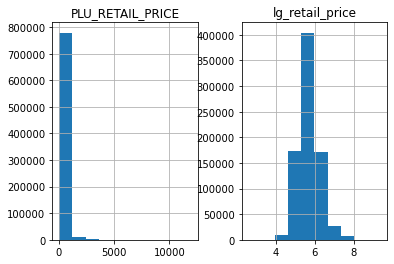

In [71]:
data6["lg_retail_price"] = np.log(data6["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data6[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [72]:
data6['INTERCEPT']=1

In [73]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data6[independent_variables]

In [74]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.6  DELIVERY_CHARGE
3         1.5             WEEE
4         2.0     Installation
5         1.0  DIFFERENCE_RATE
6       126.7        INTERCEPT

In [75]:
logit = sm.Logit(data6['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.323357
         Iterations 7


In [76]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               792130
Model:                          Logit   Df Residuals:                   792123
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.05414
Time:                        07:05:20   Log-Likelihood:            -2.5614e+05
converged:                       True   LL-Null:                   -2.7080e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.0791      0.007     11.088      0.000       0.065       0.093
LEAD_TIME           0.0076      0.001      9.234      0.000       0.006       0.009
DELIVERY_CHARGE     0.0304      0.000    165.632      0.000       0.030       0.031
WEEE               -0.3897      0.009    -43.831      0.000      -0.407      -0.372
Installation       -1.1615      0.012    -96.328      0.000      -1.185      -1.138
DIFFERENCE_RATE    -0.3337      0.048     -6.943      0.000      -0.428      -0.240
INTERCEPT          -2.9304      0.042    -70.312      0.000      -3.012      -2.849
===================================================================================
"""

In [77]:
print(np.exp(result.params))

lg_retail_price    1.082301
LEAD_TIME          1.007656
DELIVERY_CHARGE    1.030850
WEEE               0.677290
Installation       0.313019
DIFFERENCE_RATE    0.716245
INTERCEPT          0.053376
dtype: float64


### Retired

In [11]:
data7 = pd.read_csv('millennials.csv')
data7.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0         923.00000             45.0     1.0          6     0   EN       1   
1         919.98999             45.0     1.0          5     1   OX       0   
2         928.00000             85.0     1.0          1     1   CV       1   
3         919.99000             65.0     1.0          7     1   CR       1   
4         923.00000              0.0     1.0          5     0   KA       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             1           1        2020  ...                      0   
2             1           1        2019  ...                      0   
3             1           1        2020  ...                      0   
4             0           0        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            1                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              1   
2                               0              0              0   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.096660  
1                 0         0.128419  
2                 0         0.165544  
3                 0         0.091067  
4                 0         0.245510  

[5 rows x 34 columns]

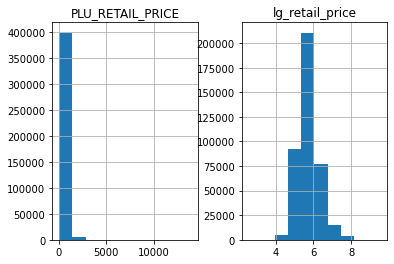

In [12]:
data7["lg_retail_price"] = np.log(data7["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data7[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [13]:
data7['INTERCEPT']=1

In [14]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data7[independent_variables]

In [15]:
logit = sm.Logit(data7['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.304976
         Iterations 7


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               405433
Model:                          Logit   Df Residuals:                   405426
Method:                           MLE   Df Model:                            6
Date:                Sun, 02 Aug 2020   Pseudo R-squ.:                 0.08728
Time:                        01:55:09   Log-Likelihood:            -1.2365e+05
converged:                       True   LL-Null:                   -1.3547e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1644      0.009     17.541      0.000       0.146       0.183
LEAD_TIME           0.0053      0.001      4.530      0.000       0.003       0.008
DELIVERY_CHARGE     0.0416      0.000    144.711      0.000       0.041       0.042
WEEE               -0.7710      0.015    -51.995      0.000      -0.800      -0.742
Installation       -1.3659      0.019    -71.217      0.000      -1.403      -1.328
DIFFERENCE_RATE     0.1046      0.073      1.428      0.153      -0.039       0.248
INTERCEPT          -3.5948      0.056    -64.267      0.000      -3.704      -3.485
===================================================================================
"""

In [17]:
print(np.exp(result.params))

lg_retail_price    1.178635
LEAD_TIME          1.005342
DELIVERY_CHARGE    1.042440
WEEE               0.462567
Installation       0.255150
DIFFERENCE_RATE    1.110255
INTERCEPT          0.027467
dtype: float64


### Try

In [23]:
data_try = pd.read_csv('washing_machine_df19.csv')
data_try.head()

key_0  key_1  PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME_x  LEAD_TIME  WEEE  \
0      9     30            1279.0              0.0       1.0          7     1   
1      9     30            1279.0             25.0       1.0         17     0   
2      9     30             169.0             65.0       1.0          4     1   
3      9     30             169.0              0.0       1.0          4     0   
4      9     30             189.0              0.0       1.0          4     0   

  AREA  D_OR_Q  Installation  IF_WEEKEND  ORDER_YEAR  ORDER_MONTH  ORDER_DAY  \
0   TR       1             1           0        2019            9         30   
1   RG       0             1           0        2019            9         30   
2   PO       0             1           1        2019            9         30   
3   LL       1             0           1        2019            9         30   
4   FK       1             0           1        2019            9         30   

   DELIVERY_DAY  DELIVERY_MONTH  DELIVERY_YEAR  DIFFERENCE_RATE  VOLUME_y  
0             7              10           2019         0.293692    2298.0  
1            17              10           2019         0.087209    2298.0  
2             4              10           2019         0.047662    2298.0  
3             4              10           2019         0.227520    2298.0  
4             4              10           2019         0.175533    2298.0

In [26]:
data_try["lg_retail_price"] = np.log(data_try["PLU_RETAIL_PRICE"]+1) # Transfrom to Log
axes = data_try[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [27]:
data_try["lg_lead_time"] = np.log(data_try["LEAD_TIME"]+1) # Transfrom to Log
axes = data_try[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [29]:
data_try["lg_volume"] = np.log(data_try["VOLUME_y"]) # Transfrom to Log
axes = data_try[["VOLUME_y","lg_volume"]].hist() # draw Histogram

In [34]:
independent_variables = ['lg_retail_price', 'lg_lead_time','DELIVERY_CHARGE','WEEE','Installation']
X = data_try[independent_variables]
robust_results = smf.ols(formula="lg_volume ~ lg_retail_price + lg_lead_time + DELIVERY_CHARGE+WEEE+Installation", data=data_try).fit(cov_type='HC1') 
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lg_volume   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     474.0
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:52:00   Log-Likelihood:                 39313.
No. Observations:              655481   AIC:                        -7.861e+04
Df Residuals:                  655475   BIC:                        -7.855e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.5289      0.005   1608.042      0.000       7.520       7.538
lg_retail_price    -0.0065      0.001     -8.040      0.000      -0.008      -0.005
lg_lead_time        0.0212      0.001     35.842      0.000       0.020       0.022
DELIVERY_CHARGE    -0.0003   2.36e-05    -14.677      0.000      -0.000      -0.000
WEEE                0.0051      0.001      6.747      0.000       0.004       0.007
Installation        0.0018      0.001      2.107      0.035       0.000       0.003
==============================================================================
Omnibus:                   165667.312   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2328271.343
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                      12.082   Cond. No.                         566.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""